# Credit Card Fraud Detection Project

* Problem: Determine whether a credit card transaction is fraudulent
* Solution: Using machine learning, a model will be created by finding patterns in a sample set of credit card transaction data to determine whether a transaction is fraudulent or legitimate

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Label
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDClassifier
import pickle

%matplotlib inline

plt.style.use('seaborn-whitegrid')

# Workflow:
1. Prepare Data: import, create dataframe, perform data wrangling for any missing data
2. Exploratory Data Analysis (Descriptive Method): Using visualization library like matplotlib
3. Choose the correct estimator/algorithm for the problem and dataset.
4. Create a test and train splits the feature variables and target variable
5. Fit the test on the selected model
6. Evaluate model
7. Tune model by changing model hyper parameters
8. Save and load the trained model
9. Use model to predict whether a credit card transaction is fraudulent

## Table View of the Sample Dataset

In [3]:
# import data and create dataframe
sample_data = pd.read_csv("data/card_transaction_data.csv")
sample_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## Descriptive Methods

In [4]:
sample_data_stats = pd.DataFrame(sample_data[['distance_from_home', 
                                             'distance_from_last_transaction', 
                                             'ratio_to_median_purchase_price']].describe())
sample_data_stats.style.set_caption("Descriptive Statistics of Sample Dataset's Numerical Data")

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182
std,65.390784,25.843093,2.799589
min,0.004874,0.000118,0.004399
25%,3.878008,0.296671,0.475673
50%,9.967760,0.998650,0.997717
75%,25.743985,3.355748,2.096370
max,10632.723672,11851.104565,267.802942


In [5]:
# Setting variables

count_repeat_retailer = sample_data[sample_data['repeat_retailer'] == 1.0].count()['repeat_retailer']
count_non_repeat_retailer = sample_data[sample_data['repeat_retailer'] == 0.0].count()['repeat_retailer']
count_repeat_retailer, count_non_repeat_retailer, count_non_repeat_retailer + count_repeat_retailer

repeat_retailer = {
    "Repeat": count_repeat_retailer,
    "Non-Repeat": count_non_repeat_retailer
}

count_used_chip = sample_data[sample_data['used_chip'] == 1.0].count()['used_chip']
count_no_chip = sample_data[sample_data['used_chip'] == 0.0].count()['used_chip']

used_chip = {
    "Used Chip": count_used_chip,
    "Did Not Use Chip": count_no_chip
}

labels = 'Used Pin', 'Did Not Use Pin'
explode = (0, 0.1)

count_used_pin = sample_data[sample_data['used_pin_number'] == 1.0].count()['used_pin_number']
count_no_pin = sample_data[sample_data['used_pin_number'] == 0.0].count()['used_pin_number']

sizes = [count_used_pin, count_no_pin]

used_pin = {
    "Used Pin": count_used_pin,
    "Did Not Use Pin": count_no_pin
}


labels_online_order = 'Online Order', 'Not Online Order'
explode_online_order = (0, 0.1)

count_online_order = sample_data[sample_data['online_order'] == 1.0].count()['online_order']
count_not_oneline_order = sample_data[sample_data['online_order'] == 0.0].count()['online_order']

sizes_online_order = [count_online_order, count_not_oneline_order]

## Data Visualizations

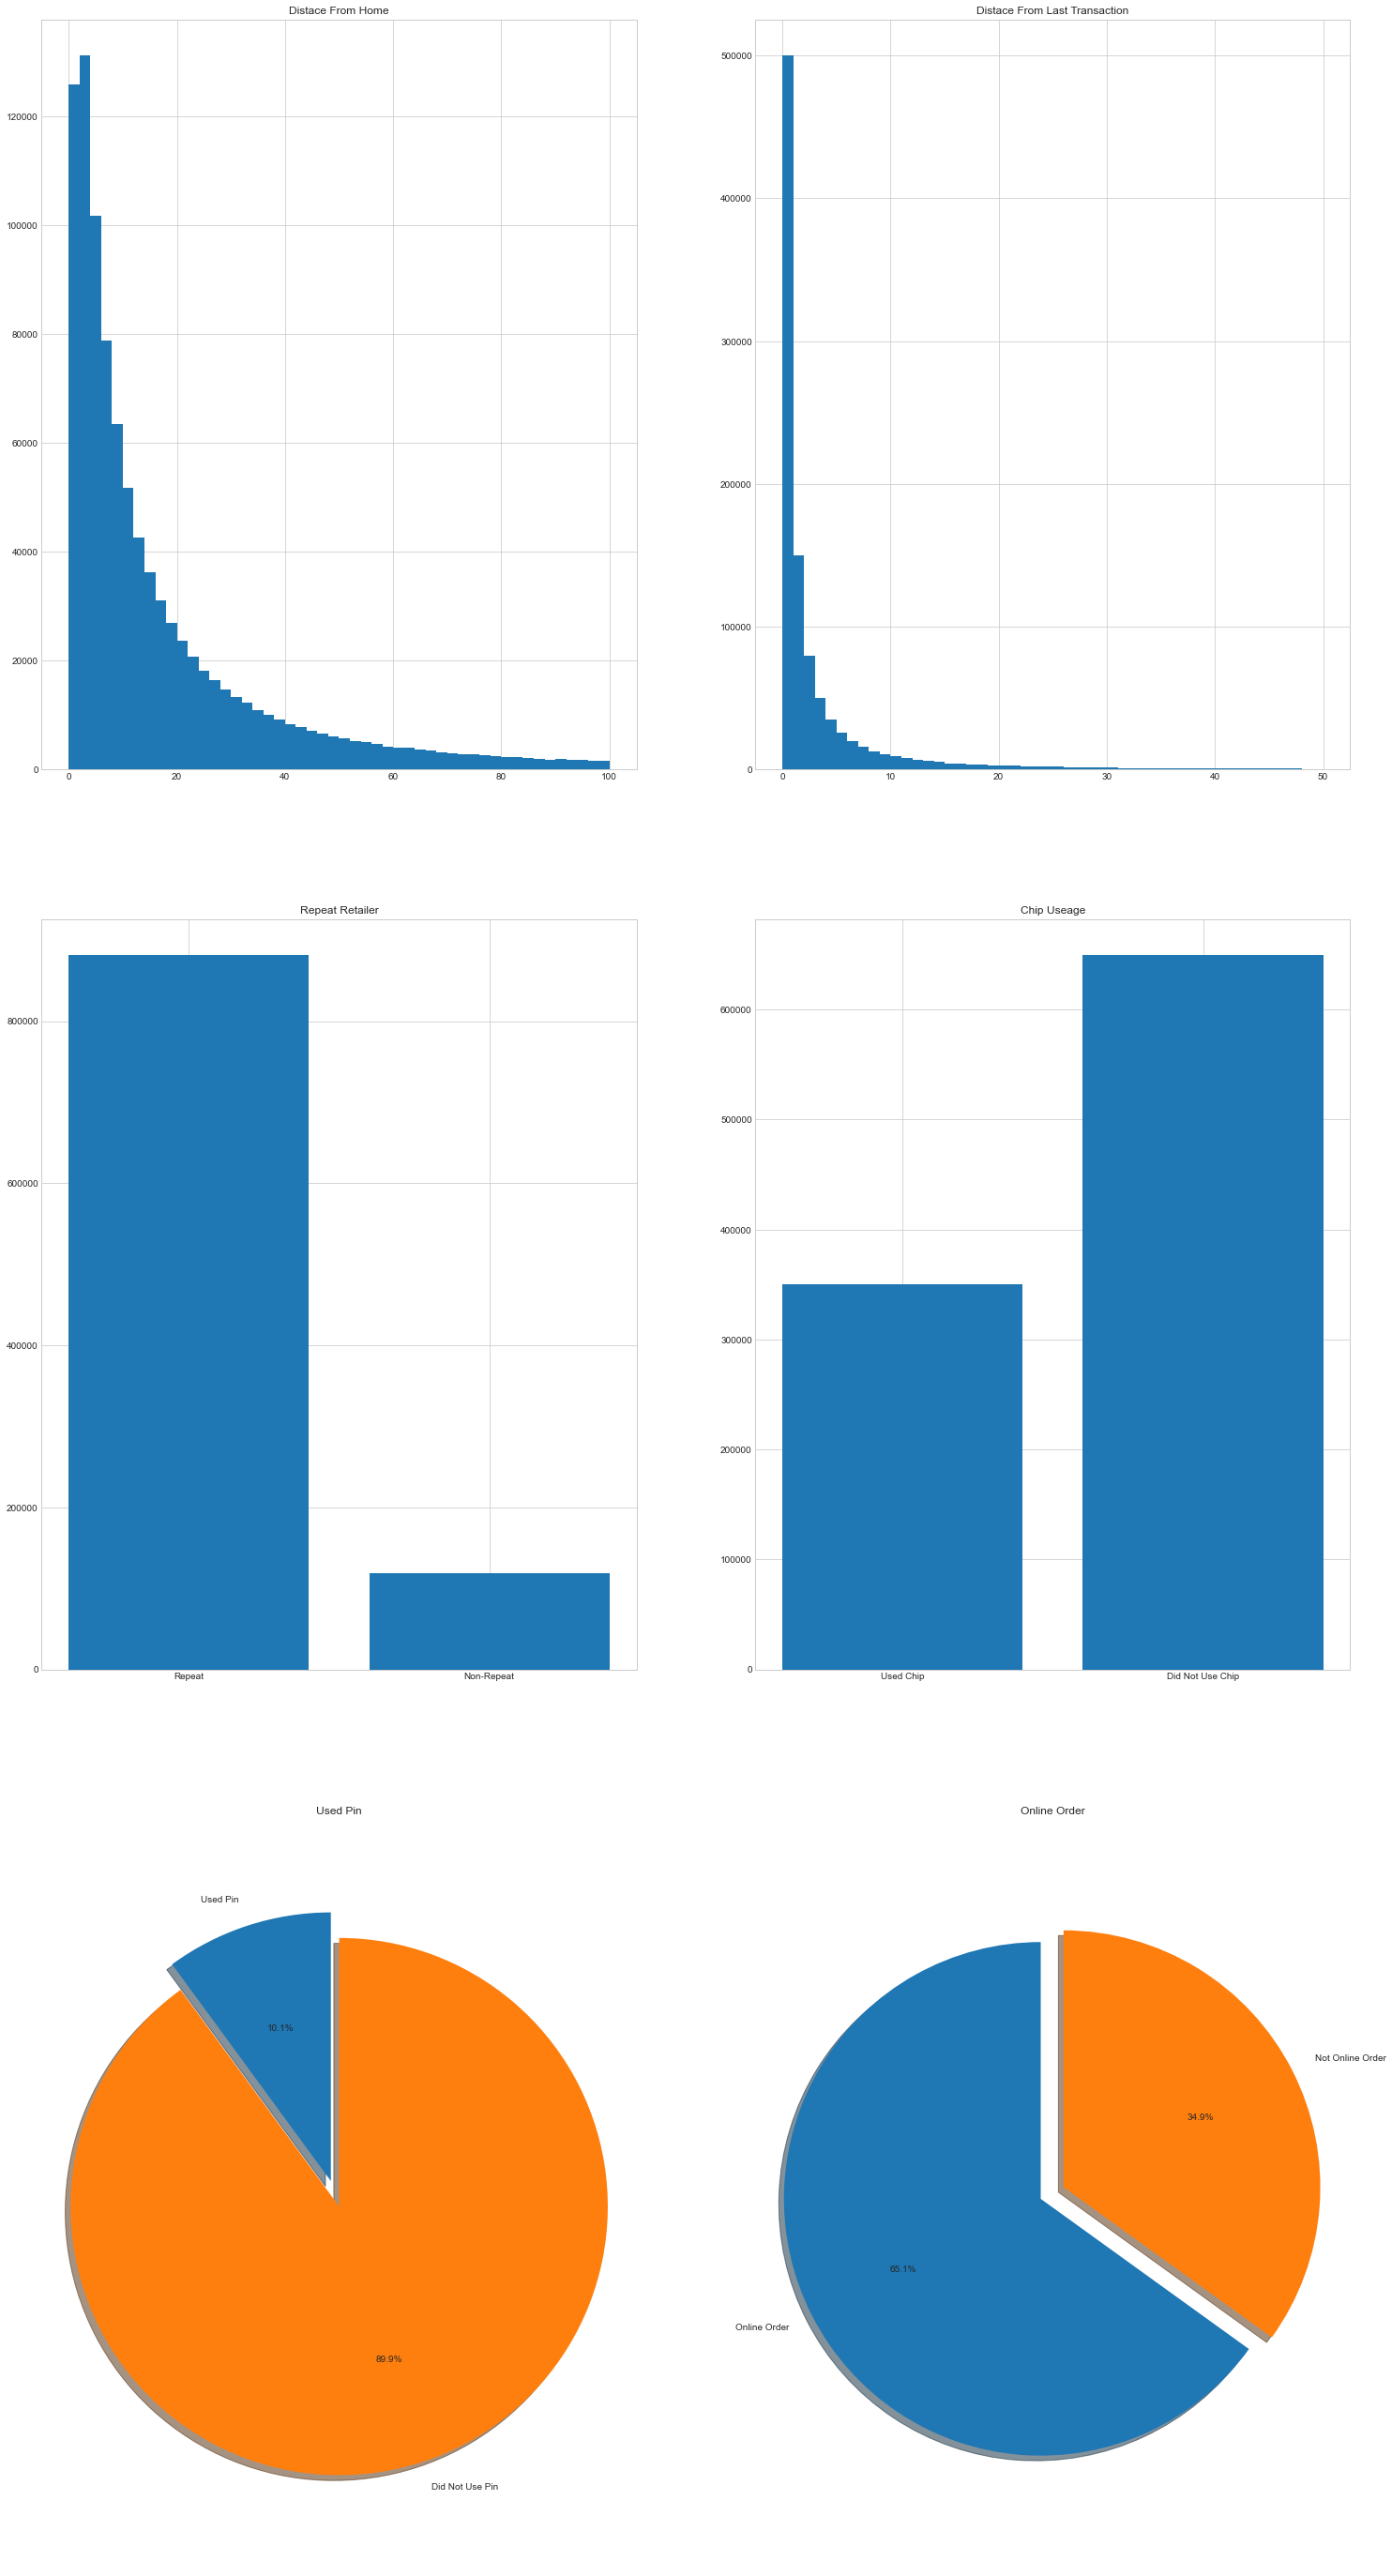

In [6]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(25,50))

#ax1 will show a histogram of distribution of the transactions' distance from home
ax1.hist(sample_data['distance_from_home'], bins=50, range=(0,100))
ax1.set(title="Distace From Home")

ax2.hist(sample_data['distance_from_last_transaction'], bins=50, range=(0,50))
ax2.set(title="Distace From Last Transaction")

ax3.bar(repeat_retailer.keys(), repeat_retailer.values())
ax3.set(title="Repeat Retailer")

ax4.bar(used_chip.keys(), used_chip.values())
ax4.set(title="Chip Useage")

ax5.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax5.axis('equal')
ax5.set(title="Used Pin")

ax6.pie(sizes_online_order, explode=explode_online_order, labels=labels_online_order, shadow=True, startangle=90, autopct='%1.1f%%')
ax6.axis('equal')
ax6.set(title="Online Order")

plt.plot(color="mediumvioletred")
plt.show()

In [7]:
# create test train data sample split
np.random.seed(95)

# set variable 'X' as all the columns from sample_data except for columnn 'fraud'
X = sample_data.drop('fraud', axis=1)

# set variable 'y' as the column 'fraud' of sample_data
y = sample_data['fraud']

# create a test and train split on X and y. The test split will be a randomly selected 20% of the sample size.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

In [8]:
# Instantiate the selected model
model = SGDClassifier(loss="hinge", max_iter=10000)

# Fit the data to the model (ie: train the model using the train sets)
model.fit(X_train, y_train)

# store predictions in a variable
y_preds = model.predict(X_test)

### These values indicate the model's performance scores

In [9]:
from sklearn.metrics import mean_absolute_error, accuracy_score
print(f"Mean Error: {mean_absolute_error(y_test, y_preds)} , Accuracy Score: {accuracy_score(y_test, y_preds)}")

Mean Error: 0.03932375 , Accuracy Score: 0.96067625


# INPUT YOUR TRANSACTION DETAILS HERE

In [10]:
dfh_slider = widgets.FloatSlider(
        value=0.0,
        min=0,
        max=1000.0,
        step=0.5,
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
        #description = 'Distance from Home: '
)

dflt_slider = widgets.FloatSlider(
        value=0.0,
        min=0,
        max=1000.0,
        step=0.5,
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
        #description='Distance from Last Transaction: '
)

rtmpp_slider = widgets.FloatSlider(
        value=0.0,
        min=0.0,
        max=275.0,
        step=0.1,
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
)

rr_selector = widgets.Dropdown(
    options=[('Yes', 1.0), ('No', 0.0)],
    value=1.0,
    disabled=False,
)

uc_selector = widgets.Dropdown(
    options=[('Yes', 1.0), ('No', 0.0)],
    value=1.0,
    disabled=False,
)

up_selector = widgets.Dropdown(
    options=[('Yes', 1.0), ('No', 0.0)],
    value=1.0,
    disabled=False,
)

oo_selector = widgets.Dropdown(
    options=[('Yes', 1.0), ('No', 0.0)],
    value=1.0,
    disabled=False,
)

In [11]:
h1 = HBox([
    Label('Distance from Home (KM):'),
    dfh_slider
])
    
h2 = HBox([
    Label('Distance from Last Transaction (KM):'), 
    dflt_slider
])

h3  = HBox([
    Label('Ratio to Median Purchase Price:'), 
    rtmpp_slider
])

h4 = HBox([
    Label('Repeat retailer?'),
    rr_selector
])

h5 = HBox([
    Label('Used Chip?'),
    uc_selector
])

h6 = HBox([
    Label('Used Pin?'),
    up_selector
])

h7 = HBox([
    Label('Online Order?'),
    oo_selector
])


VBox([h1, h2, h3, h4, h5, h6, h7])


## This is where the transaction data set that the user has inputted will be used on the model.
* The model will then determine whether the entered transaction details result in a legitimate or fraudulent transaction

In [12]:
# Hold feature names in variable
feature_names = X.columns

distance_from_home = dfh_slider.value
distance_from_last_transaction = dflt_slider.value
ratio_to_median_purchase_price = rtmpp_slider.value
repeat_retailer = rr_selector.value
used_chip = uc_selector.value
used_pin_number = up_selector.value
online_order = oo_selector.value

# Testing the model with user inputted data set.
transac_1 = pd.DataFrame(data=([[distance_from_home, 
                                distance_from_last_transaction, 
                                ratio_to_median_purchase_price, 
                                repeat_retailer, 
                                used_chip, 
                                used_pin_number, 
                                online_order]]), 
                        columns=feature_names)

# print the results

def run_model(dataframe):
    distance_from_home = dfh_slider.value
    distance_from_last_transaction = dflt_slider.value
    ratio_to_median_purchase_price = rtmpp_slider.value
    repeat_retailer = rr_selector.value
    used_chip = uc_selector.value
    used_pin_number = up_selector.value
    online_order = oo_selector.value

    transac_1 = pd.DataFrame(data=([[distance_from_home, 
                                distance_from_last_transaction, 
                                ratio_to_median_purchase_price, 
                                repeat_retailer, 
                                used_chip, 
                                used_pin_number, 
                                online_order]]), 
                        columns=feature_names)
    
    result = model.predict(transac_1)
    if (result[0] == 0.0):
        print("The model indicates that the transaction is legitimate!")
        print(f'{distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order}')
    else:
        print("The model indicates that the transaction is fradulent!")
        print(f'{distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order}')

In [13]:
button = widgets.Button(
    description='Run Model',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Run Model',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        run_model(transac_1)

button.on_click(on_button_clicked)

Button(button_style='success', description='Run Model', icon='check', style=ButtonStyle(), tooltip='Run Model'…

Output()

In [14]:
# Use this section to export a binary file of the model object.
# filename = 'trained_SGDClassifier_model.sav'
# pickle.dump(model, open(filename, 'wb'))